In [43]:
#import all the libraries 
import pandas as pd 
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction import text
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.feature_extraction import text

In [2]:
nltk.download('punkt')  #NLTK wouldn't work without this

[nltk_data] Downloading package punkt to C:\Users\Eder's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("lyrics_1.csv")  #read csv file

In [7]:
df["clean_lyrics"] = df['lyrics'].str.replace('[^\w\s]','')    #clean lryics
df["clean_lyrics"] = df['lyrics'].str.replace('\n','0') #get ride of \n
df['word_count'] = df['clean_lyrics'].str.split().str.len() #Get word count from each song title 

<ipython-input-7-5599480f56e2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["clean_lyrics"] = df['lyrics'].str.replace('[^\w\s]','')    #clean lryics


1a

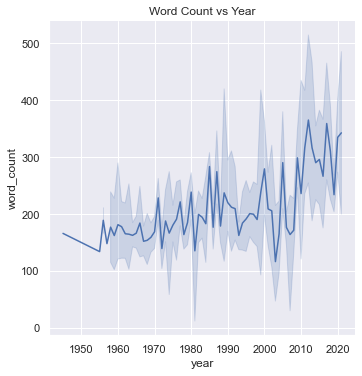

In [40]:
sns.relplot(data=df, x="year", y='word_count', kind='line').set(title='Word Count vs Year')
plt.savefig("project2_fig1_114755056.pdf")    # 1a chart

In [10]:
#Convert column word_count to a  Min-Max Scaling column.
df_normalize = pd.DataFrame(df['word_count'])
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_normalize)
df_normalized = pd.DataFrame(x_scaled)
df_normalized = df_normalized.rename(columns={0: 'Min-Max Scaling',})
normalized_scaling = df_normalized['Min-Max Scaling']
df = df.join(normalized_scaling)

1b

In [11]:
x=df['year']
y=df['Min-Max Scaling']
x=x.values.reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(x,y)


LinearRegression()

<AxesSubplot:ylabel='unique ratio'>

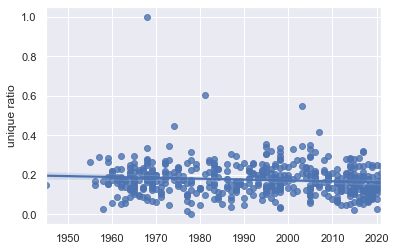

In [45]:
sns.set_theme()  #Create min-max scaling chart of word count vs year
sns.regplot(x=x,y=y)

In [46]:
#get the coef for the year 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.25)
model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)
model.coef_     #get coef 

array([-0.00052753])

2a

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


In [18]:
#tokenize the lyrics to get the number of unique words per song 
list_of_lyrics = list(df['lyrics'])
bower =CountVectorizer()
docterm=bower.fit_transform(list_of_lyrics)

In [47]:
#create new data frame to get the total of 1s for each array 
DF = pd.DataFrame(docterm.toarray(),columns=bower.get_feature_names())
DF.index.name = 'Songs'
DF = DF.replace(0, np.nan)# replace the zeros to NaN 

In [20]:
DF['Count'] = DF.notnull().sum(axis=1) #get count of each 1s in each row 
DF['Count'] = DF.count(axis=1)
count = DF['Count'] 
df = df.join(count)

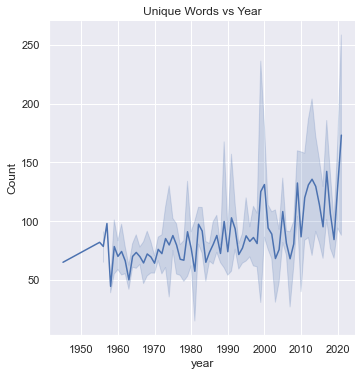

In [41]:
sns.relplot(data=df, x="year", y='Count', kind='line').set(title='Unique Words vs Year')
plt.savefig("project2_fig2_114755056.pdf") #2a chart 

In [23]:
#Convert column word_count to a  Min-Max Scaling column.
df_normalize_unique = pd.DataFrame(df['Count'])
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_unique = min_max_scaler.fit_transform(df_normalize_unique)
df_normalized_unique = pd.DataFrame(x_scaled_unique)
df_normalized_unique = df_normalized_unique.rename(columns={0: 'Min-max scaling unique',})
normalized_scaling_unique = df_normalized_unique['Min-max scaling unique']
df = df.join(normalized_scaling_unique)

In [487]:
#get the coef for the year 
x=df['year']
y=df['Min-max scaling unique']
x=x.values.reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(x,y)


LinearRegression()

<AxesSubplot:ylabel='Min-Max Scaling'>

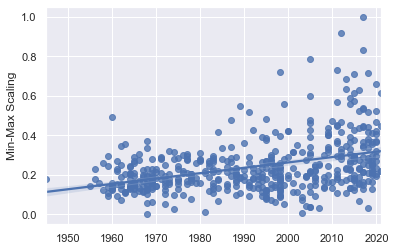

In [25]:
sns.set_theme()
sns.regplot(x=x,y=y)

In [26]:
#get the coef for the year 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)
model.coef_     #get coef 

array([0.00286083])

In [27]:
df['ratio'] = df['Count'] / df['word_count']       #  df['Count'] = unique word count   and  df['word_count']  = lyric word count

In [28]:
#Convert column word_count to a  Min-Max Scaling column.
df_normalize_ratio = pd.DataFrame(df['ratio'])
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_ratio = min_max_scaler.fit_transform(df_normalize_ratio)
df_normalized_ratio = pd.DataFrame(x_scaled_ratio)
df_normalized_ratio = df_normalized_ratio.rename(columns={0: 'unique ratio',})
normalized_scaling_ratio = df_normalized_ratio['unique ratio']
df = df.join(normalized_scaling_ratio)

In [29]:
#get the coef for the year 
x=df['year']
y=df['unique ratio']
x=x.values.reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(x,y)


LinearRegression()

<AxesSubplot:ylabel='unique ratio'>

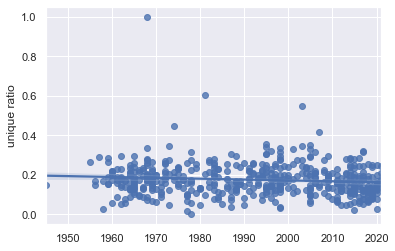

In [30]:
sns.set_theme()
sns.regplot(x=x,y=y)

In [31]:
#get the coef for the year 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.25)

model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)
model.coef_     #get coef 

array([-0.00051464])

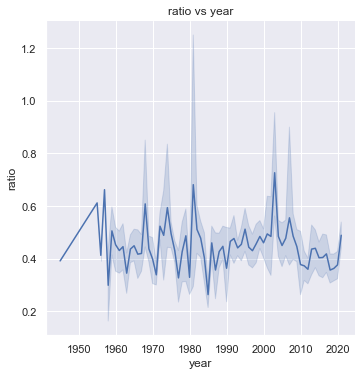

In [42]:
sns.relplot(data=df, x="year", y='ratio', kind='line').set(title='ratio vs year')
plt.savefig("project2_fig3_114755056.pdf") 